In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

seed = 5885
rng = np.random.default_rng(seed)

# rng.uniform(size = 4*6)

In [4]:
def loc_vel_assigner(Natoms):
    color_array = []
    Atoms = np.zeros(Natoms)
    apos = np.zeros((Natoms,3))
    p = np.zeros((Natoms,3))
    for i in range(Natoms):
        Atoms[i] = i
        x = np.random.normal(loc = 0.0, scale = 2*Rbeam)
        y = np.random.normal(loc = 0.0, scale = Rbeam)
        z = np.random.normal(loc = 0.0, scale = Rbeam)
        if Atoms[i] < Natoms/2:
            color_array.append('b')
            apos[i] = np.array([x-L,y,z])
            px = 1
            py = 0
            pz = 0
            p[i] =  np.array([px,py,pz])
        else:
            color_array.append('r')
            apos[i] = np.array([x+L,y,z])
            px = -1
            py = 0
            pz = 0
            p[i] =  np.array([px,py,pz])
    return Atoms, apos, p, color_array

def checkCollisions(apos,Natoms,Ratom):
    hitlist = []
    r2 = 2*Ratom
    for i in range(Natoms):
        ai = apos[i]
        for j in range(i) :
            aj = apos[j]
            dr = ai - aj
            if np.linalg.norm(dr) < r2: hitlist.append([i,j])
    return np.array(hitlist)

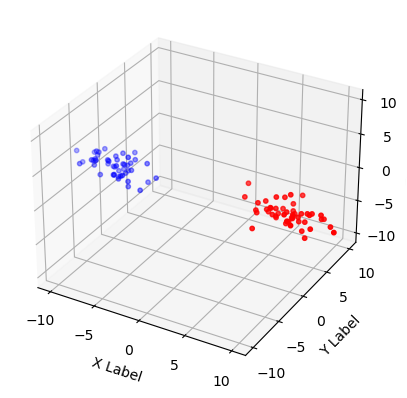

change! [64 19]
change! [85 38]
['b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'y' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'y' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'm' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'm' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r']
Solve took 1.19946 seconds


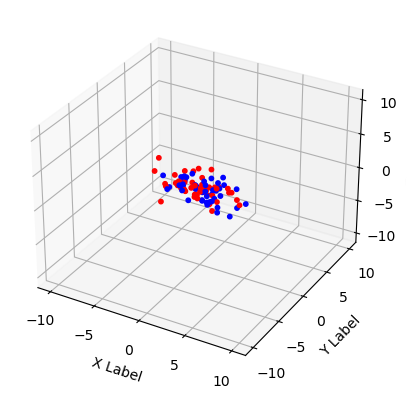

[array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01,  9.44430487e-01]), array([ 3.53378033e+03, -5.79583991e-01

In [166]:
t0 = time.time()
Natoms = 100

Rbeam = 1
L = 10

# mass = (4/6)*10**(-26) # helium mass
mass = 1
Ratom = 0.1 # wildly exaggerated size of helium atom
# dt = 10**(-5)
dt = 0.1

Atoms, apos, p, color_array = loc_vel_assigner(Natoms)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(apos[:,0], apos[:,1], apos[:,2], marker='o', color = color_array, s = Ratom*10**2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axes.set_xlim3d(left = -(L+Rbeam), right = (L+Rbeam)) 
ax.axes.set_ylim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
ax.axes.set_zlim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
plt.show()
    
#Delete the particles that where colidining since the begining
hitlist = checkCollisions(apos,Natoms,Ratom)

apos = np.delete(apos, hitlist[:,0], 0) 
color_array = np.delete(color_array, hitlist[:,0]) 
p = np.delete(p, hitlist[:,0], 0) 
Natoms = Natoms-len(hitlist)

particle_track = np.array([])
particle_trajectory = []


for t in range(100):
    for i in range(Natoms): 
        apos[i] = apos[i] + (p[i]/mass)*dt
    c = 0
    for index in particle_track:
        particle_trajectory[c].append(apos[int(index)])
        c = c + 1        
    # Check for collisions
    hitlist = checkCollisions(apos,Natoms,Ratom)
    # If any collisions took place, update momenta of the two atoms
    for ij in hitlist:
        i = ij[0]
        j = ij[1]

        particle_track = np.append(particle_track, i)
        particle_track = np.append(particle_track, j)
        particle_trajectory.append([apos[i]])
        particle_trajectory.append([apos[j]])
        
        ptot = p[i]+p[j]
        posi = apos[i]
        posj = apos[j]
        vi = p[i]/mass
        vj = p[j]/mass
        vrel = vj-vi
        a = np.linalg.norm(vrel)**2
        if a == 0: continue;  # exactly same velocities
        rrel = posi-posj
        if np.linalg.norm(rrel) > Ratom: continue # one atom went all the way through another
        # theta is the angle between vrel and rrel:
        dx = np.dot(rrel, vrel/np.linalg.norm(vrel))       # rrel.mag*cos(theta)
        dy = np.linalg.norm(np.cross(rrel, vrel/np.linalg.norm(vrel))) # rrel.mag*sin(theta)
        # alpha is the angle of the triangle composed of rrel, path of atom j, and a line
        #   from the center of atom i to the center of atom j where atome j hits atom i:
        alpha = np.arcsin(dy/(2*Ratom)) 
        d = (2*Ratom)*np.cos(alpha)-dx # distance traveled into the atom from first contact
        deltat = d/np.linalg.norm(vrel)         # time spent moving from first contact to position inside atom
        posi = posi-vi*deltat # back up to contact configuration
        posj = posj-vj*deltat
        mtot = 2*mass
        pcmi = p[i]-ptot*mass/mtot # transform momenta to cm frame
        pcmj = p[j]-ptot*mass/mtot
        rrel = vrel/np.linalg.norm(rrel)
        pcmi = pcmi-2*np.dot(pcmi, rrel)*rrel # bounce in cm frame
        pcmj = pcmj-2*np.dot(pcmj, rrel)*rrel
        p[i] = pcmi+ptot*mass/mtot # transform momenta back to lab frame
        p[j] = pcmj+ptot*mass/mtot
        apos[i] = posi+(p[i]/mass)*deltat # move forward deltat in time
        apos[j] = posj+(p[j]/mass)*deltat
        color_array[i] = 'm'
        color_array[j] = 'yellow'
        print('change!', ij)
print(color_array)
print('Solve took %lg seconds' % (time.time()-t0,))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(apos[:,0], apos[:,1], apos[:,2], marker='o', color = color_array, s = Ratom*10**2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axes.set_xlim3d(left = -(L+Rbeam), right = (L+Rbeam)) 
ax.axes.set_ylim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
ax.axes.set_zlim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
plt.show()

print(particle_trajectory[0])

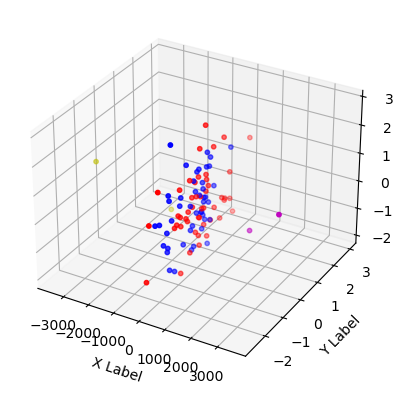

[2.30247443 0.67223809 1.00465962] [-1.23650301  0.90995798  1.5588425 ]


In [179]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(apos[:,0], apos[:,1], apos[:,2], marker='o', color = color_array, s = Ratom*10**2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

print(apos[46], apos[54])
